In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Data_preprocess as preprocess
from lregression import LogisticRegression
import k_fold_crossv
plt.rcParams.update({'figure.max_open_warning': 0})

## 1. Data Processing

In [25]:
content = pd.read_csv(**preprocess.cryotherapy_data_config).dropna()

In [26]:
content.Result_of_Treatment=np.float64(content.Result_of_Treatment) #print content

In [27]:
content

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0.0
1,1,29,7.00,5,1,96,1.0
2,1,50,8.00,1,3,132,0.0
3,1,32,11.75,7,3,750,0.0
4,1,67,9.25,1,1,42,0.0
...,...,...,...,...,...,...,...
85,2,34,12.00,3,3,95,0.0
86,2,20,3.50,6,1,75,1.0
87,2,35,8.25,8,3,100,0.0
88,1,24,10.75,10,1,20,1.0


C:\Users\fandi\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


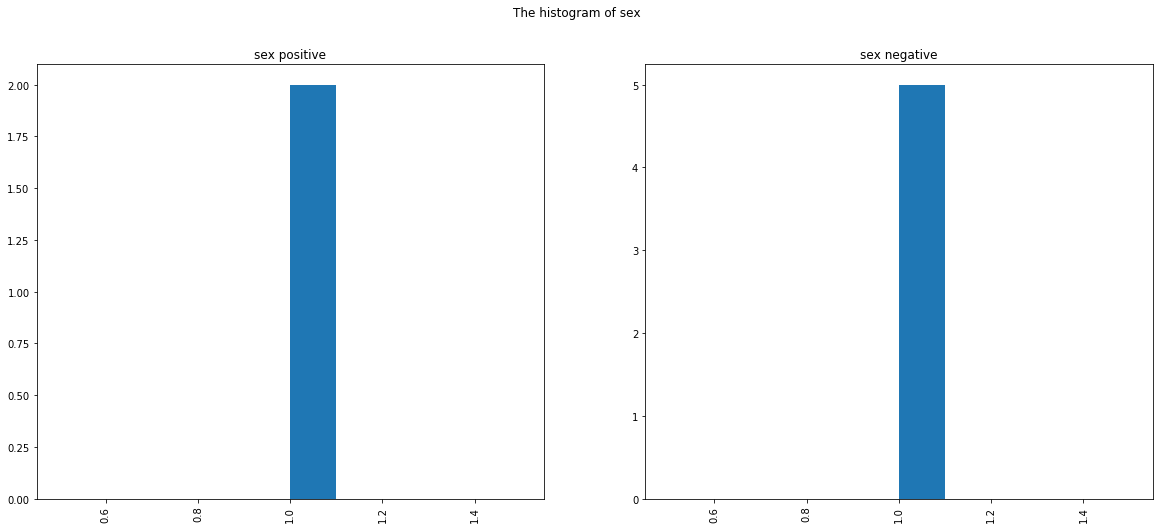

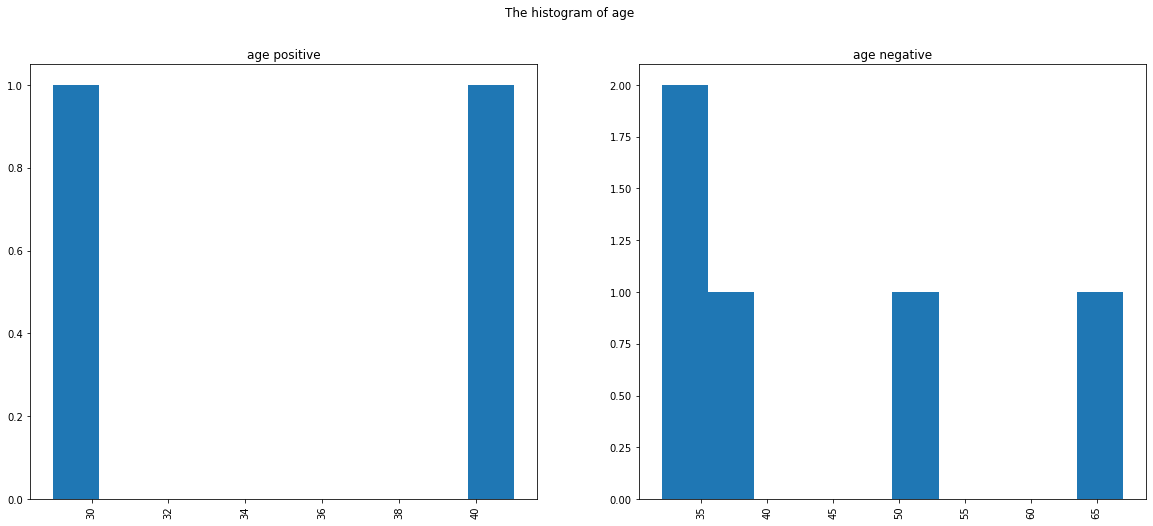

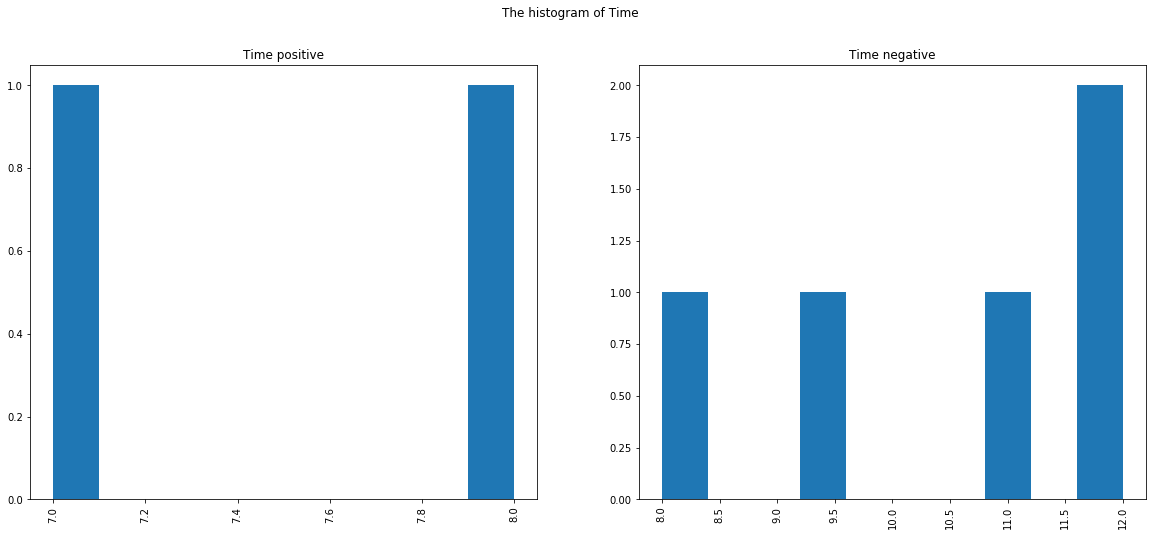

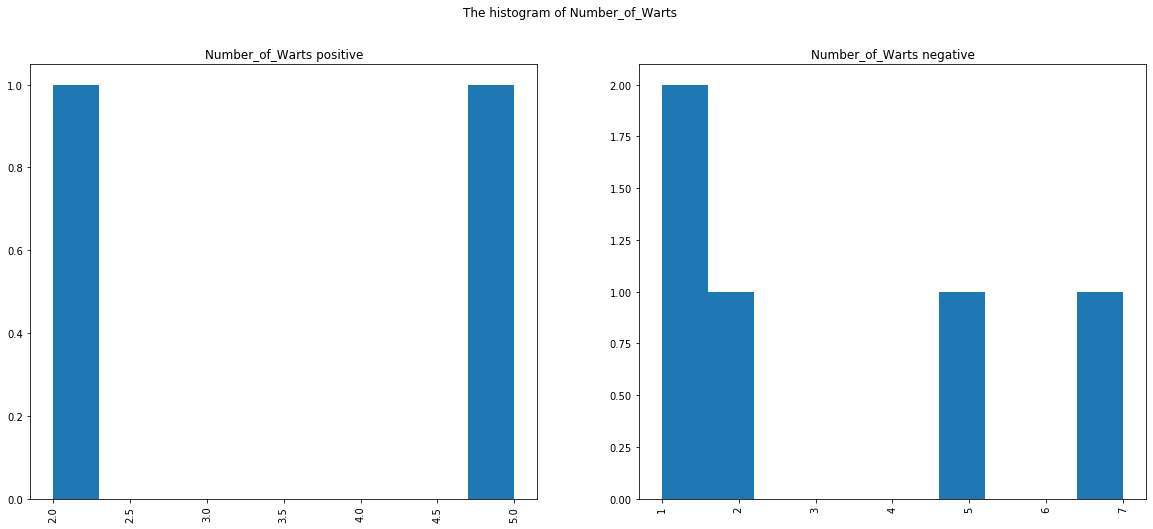

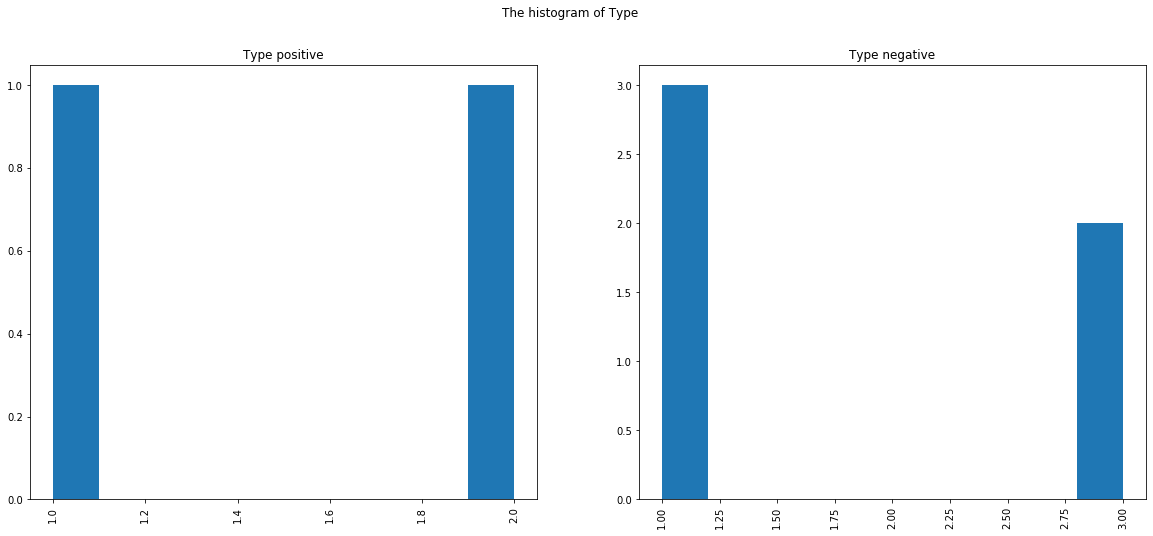

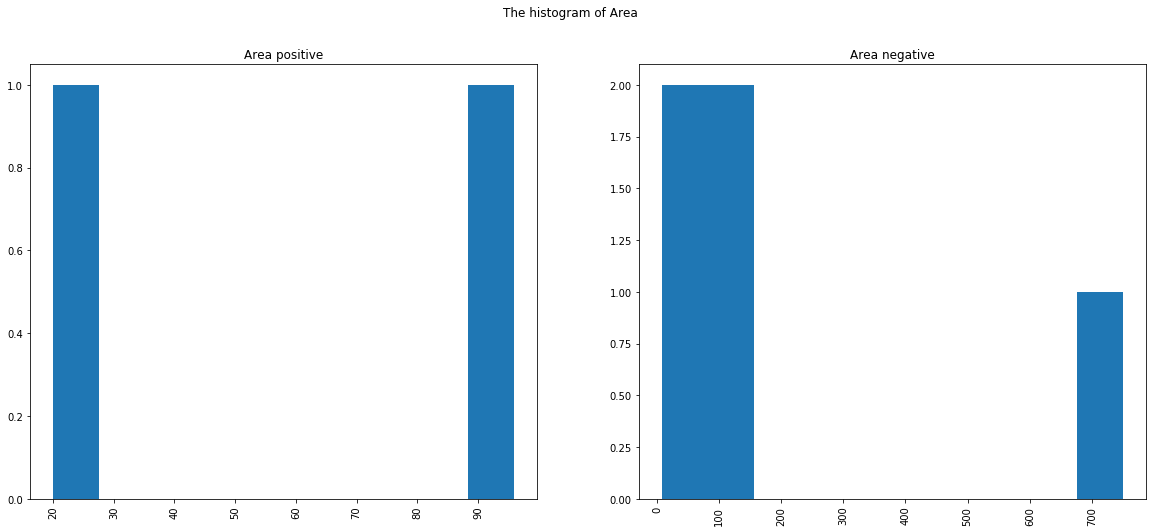

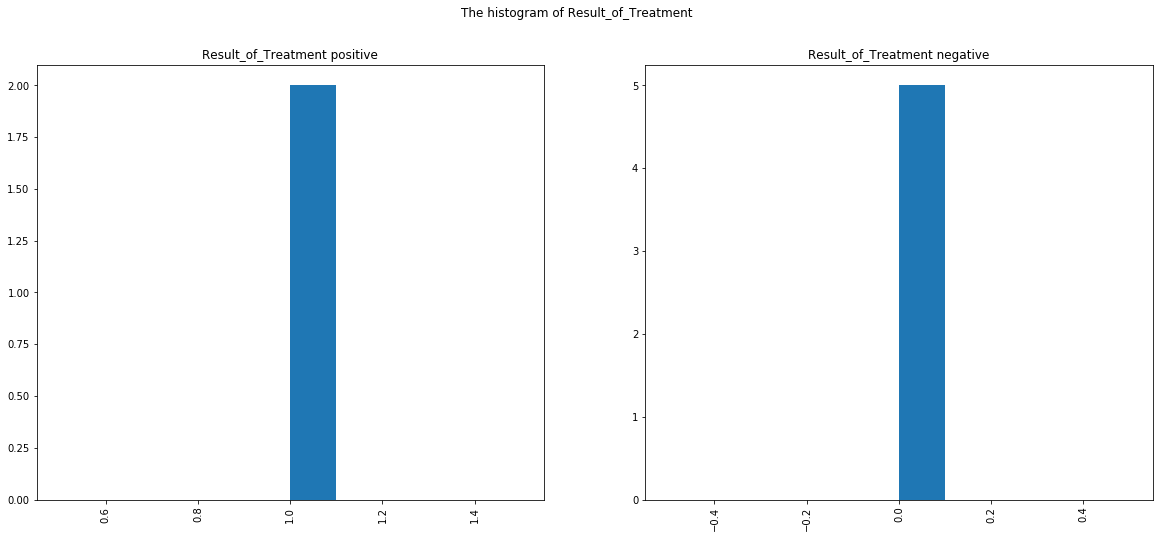

In [28]:
negative1,positive1=preprocess.data_analysis(content.as_matrix(),6)
preprocess.draw_hist(content, positive1,negative1) #Draw histograms

## 2. Evaluate Model Performance - Logistic Regression

In [29]:
model = LogisticRegression()
num_feature = len(content.keys()) - 1
content_x=np.matrix(content.values[:, range(num_feature)])
content_y = np.array(content.values[:, num_feature])
def shuffle_data(X, y):
    data = np.hstack((X, np.matrix(y).T))
    np.random.shuffle(data)
    X = data[:, range(np.shape(data)[1]-1)]
    y = np.array(data[:, np.shape(data)[1]-1].T)[0]
    return X, y

In [30]:
X,y=shuffle_data(content_x,content_y)
print(type(X))

<class 'numpy.matrix'>


In [31]:
from sklearn.preprocessing import normalize
X = normalize(X, 'max')

In [32]:
model = LogisticRegression()
model = k_fold_crossv.fitModelWithValidate(model, X,np.matrix(y).T, 0.2, 0.1 / X.shape[0],0.0000,50000, True)

50000


In [33]:
ls_set=[0.1 / X.shape[0]]
epsilon_set=[0.0000]
max_iters = [5000]
acct=[]
pred=[]
iteration=[]
for i in range(len(ls_set)):
    for j in range(len(epsilon_set)):
        for max_iter in max_iters:
            acc,weight,predict =k_fold_crossv.k_fold_validation(LogisticRegression, X,y,5,ls_set[i],epsilon_set[j],max_iter)
            acct.append(acc)
            pred.append(predict)
print('acc',acct)

5000
5000
5000
5000
5000
acc [0.5333333333333333]


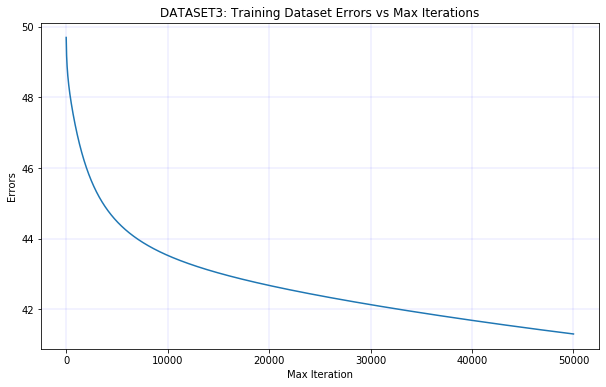

In [35]:
plt.figure(num=None, figsize=(10,6))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.title('DATASET3: Training Dataset Errors vs Max Iterations')
plt.xlabel('Max Iteration')
plt.ylabel('Errors')
plt.plot(model.report.epochs, model.report.errors)
plt.savefig("Dataset3_Training_error_vs_maxiter.png", dpi = 300)

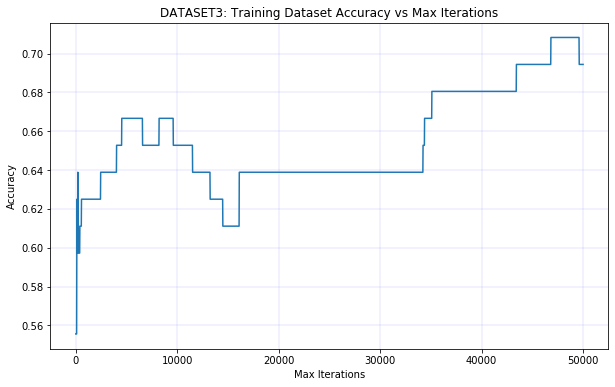

In [36]:
plt.figure(num=None, figsize=(10,6))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.title('DATASET3: Training Dataset Accuracy vs Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.plot(model.report.epochs, model.report.accs)
plt.savefig("Dataset3_Training_Accuracy_vs_maxiter.png", dpi = 300)

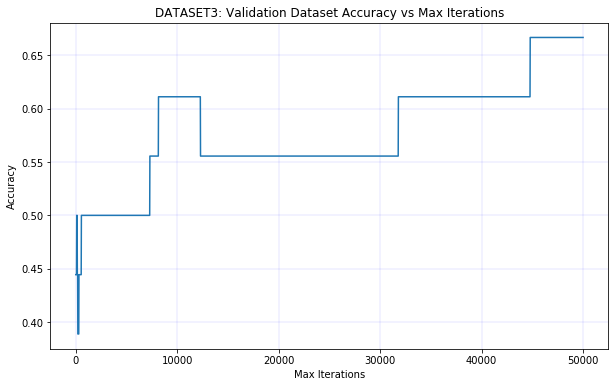

In [37]:
plt.figure(num=None, figsize=(10,6))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.title('DATASET3: Validation Dataset Accuracy vs Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.plot(model.report.epochs, model.report.val_accs)
plt.savefig("Dataset3__Validation_Accuracy_vs_maxiter.png", dpi = 300)

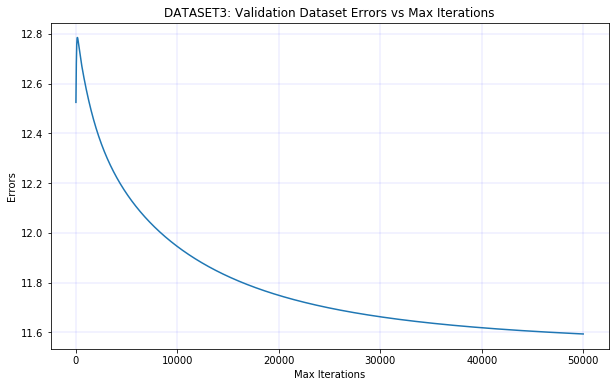

In [38]:
plt.figure(num=None, figsize=(10,6))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.title('DATASET3: Validation Dataset Errors vs Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Errors')
plt.plot(model.report.epochs, model.report.val_errors)
plt.savefig("Dataset3__Validation_Errors_vs_maxiter.png", dpi = 300)